<a href="https://colab.research.google.com/github/bennetthamilton/Bennett_Hamilton_Jupyters/blob/main/CS_325_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Bennett Hamilton
hamibenn@oregonstate.edu
Programming Exercise 2
CS 325 Algorithms Spring 2023
```

# Part I: Implement the brute-force 0/1 Knapsack problem

Complete the brute force implementation of the 0/1 Knapsack problem.

In [59]:
# Returns the maximum value that can be put in a knapsack of capacity W 
# ref: https://www.analyticsvidhya.com/blog/2022/05/knapsack-problem-in-python/
# ref: https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/
def knapsack_bf(W, weights, values, n): 
  
  # base case
  if n == 0 or W == 0:
    return 0

  # if weight is higher than capacity, then don't include item
  if weights[n-1] > W:
    return knapsack_bf(W, weights, values, n-1)
  # else find the next possible item to add
  else:
    return max(values[n-1] + knapsack_bf(W-weights[n-1], weights, values, n-1), 
               knapsack_bf(W, weights, values, n-1))
  

# Brute Force Test 1

In [60]:
import time
values  = [50, 100, 150]  # values
weights = [10, 20, 30]    # weights
W = 50   # weight capacity   
n = len(values) 
t = time.process_time()
result = knapsack_bf(W , weights , values , n)
assert result == 250, 'Failed Brute Force Test 1'
print('Passed BF Test 1 with', result, 'in', '{:.5f}'.format(time.process_time()-t), 'seconds')

Passed BF Test 1 with 250 in 0.00018 seconds


#Brute Force Test 2

In [61]:
import time
values  = [1, 3, 7, 11, 14, 17, 20, 25, 37, 42, 50]      # values
weights = [1, 4, 6, 3, 15, 3, 42, 7, 9, 10, 72]    # weights
W = 1500  # weight capacity   
n = len(values) 
t = time.process_time()
result = knapsack_bf(W , weights , values , n)
assert result == 227, 'Failed Brute Force Test 1'
print('Passed BF Test 1 with', result, 'in', '{:.5f}'.format(time.process_time()-t), 'seconds')

Passed BF Test 1 with 227 in 0.00214 seconds




---


# Part II: Implement dynamic-programming 0/1 Knapsack problem

Complete the dynamic programming implementation of the 0/1 Knapsack problem.

In [62]:
# Returns the maximum value that can be put in a knapsack of capacity W 
# ref: https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/
def knapsack_dp(W, weights, values, n): 
  
  # define the K array size and fill it with zeroes
  K = [[0 for x in range(W + 1)] for x in range(n + 1)]
 
  # Build table K[][] in bottom up manner
  for i in range(n + 1):
      for j in range(W + 1):
          # fill 0th row/cols with zero
          if i == 0 or j == 0:
              K[i][j] = 0
          # if weight of previous is less than w, find the max
          elif weights[i-1] <= j:
              K[i][j] = max(values[i-1]+ K[i-1][j-weights[i-1]],
                            K[i-1][j])
          # else use previous value
          else:
              K[i][j] = K[i-1][j]

  return K[n][W]

#Dynamic Programming Test 1

In [63]:
import time
values  = [50, 100, 150]  # values
weights = [10, 20, 30]    # weights
W = 50   # weight capacity   
n = len(values) 
t = time.process_time()
result = knapsack_dp(W , weights , values , n)
assert result == 250, 'Failed Dynamic Programming Test 1'
print('Passed BF Test 1 with', result, 'in', '{:.5f}'.format(time.process_time()-t), 'seconds')

Passed BF Test 1 with 250 in 0.00033 seconds


#Dynamic Programming Test 2

In [64]:
import time
values  = [1, 3, 7, 11, 14, 17, 20, 25, 37, 42, 50]      # values
weights = [1, 4, 6, 3, 15, 3, 42, 7, 9, 10, 72]    # weights
W = 1500  # weight capacity   
t = time.process_time()
result = knapsack_dp(W , weights , values , len(values))
assert result == 227, 'Failed Dynamic Programming Test 2'
print('Passed DP Test 2 with', result, 'in', '{:.5f}'.format(time.process_time()-t), 'seconds')

Passed DP Test 2 with 227 in 0.01283 seconds




---


#Part III: Graph the Runtime

Run this code below after completeing your **brute force** and **dynamic programming** implementations of the 0/1 Knapsack problem. 

You do not need to write code. Please answer the brief questions below the block.

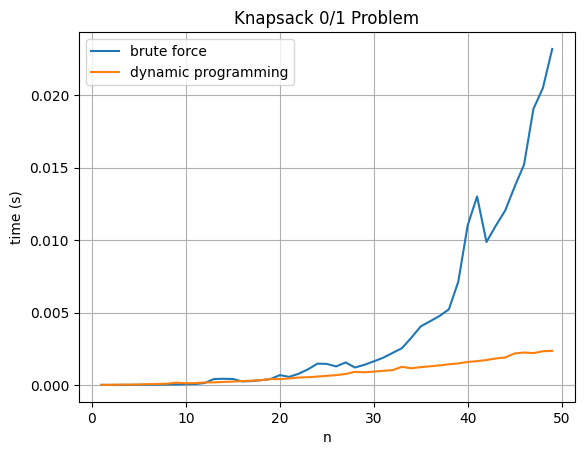

In [65]:
import time
import matplotlib.pyplot as plt
import random

# you can play with these constants to change the nature of the data. 
value_step_size = 5
weight_step_size = 3
capacity_scalar = 3

# function that runs a set of functions, times their output, and
#    graphs time vs input size
def time_algorithms(fs, fnames):
  if len(fs)!=len(fnames):
    print("Error: functions and name lists must be the same size!")
    return;
  fcount = 0
  fig, ax1 = plt.subplots()
  ax1.set_title('Knapsack 0/1 Problem')
  ax1.set_xlabel('n') 
  ax1.set_ylabel('time (s)')
  for f in fs:
    # randomly generates input data of different sizes
    elements = list() 
    times = list() 
    for i in range(1, 50): 

        # generate some data
        values = list(range(0,5*i,value_step_size))
        weights = list(range(1,5*i,weight_step_size))
        #random.shuffle(weights)
        n = len(values)
        W = capacity_scalar * i
        
        # run the algorithm and time it
        start = time.time() 
        f(W, weights, values, n) 
        end = time.time() 

        # save results for graphing
        elements.append(n) 
        times.append(end-start) 

    # graph the complexity
    ax1.plot(elements, times, label = fnames[fcount])      
    fcount = fcount + 1
    
  ax1.grid() 
  ax1.legend() 
  fig.show() 
  
  
# run the graph to plot BF vs DP.  
fs = [knapsack_bf, knapsack_dp]
fnames = ['brute force', 'dynamic programming']
time_algorithms(fs, fnames)





---


#Analysis

**Analysis Question 1: Brute Force**

*What is the complexity (big-O) of the brute force approach?  Explain/show/derive how you arrived at this conclusion. Justify your answer (in words and math) for full credit.*

The time complexity of the brute force implementation is O(n2^n). For one, you can tell by looking at the graph that the time complexity is increasing exponentially. We can also reason that the brute force method runs through all possible combinations which is 2^n and then finds the max of all valid combinations which is n.

**Analysis Question 2: Dynamic Programming**

*What is the complexity (big-O) of the dynamic programming approach?  Explain/show/derive how you arrived at this conclusion. Justify your answer (in words and
math) for full credit.*

In dynamic programming, the time complexity is O(n*W). The program runs through all elements in the array K which is defined by the number of items n and the capacity W, therefore there are n by W runs, hence O(nW).